In [58]:
import pandas as pd
import numpy as np
from statsbombpy import sb
import matplotlib.pyplot as plt


In [8]:
comp=sb.competitions()
comp

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [38]:
match_id = 3943043  # Replace with the actual match ID
events = sb.events(match_id=match_id)
events.columns

C:\Users\backo\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist

In [81]:
# Filter passes and exclude set-pieces or incomplete passes if necessary
pass_mask = (events['type'] == 'Pass') & (events['pass_outcome'].isnull()) & (events['pass_type'].isnull())
passes = events[pass_mask]

# Extract relevant columns
passes = passes[['player', 'pass_recipient', 'location', 'pass_end_location', 'minute', 'second']]

passes.tail()


,player,pass_recipient,location,pass_end_location,minute,second
900,Mikel Oyarzabal Ugarte,Marc Cucurella Saseta,"[88.9, 37.8]","[99.7, 12.7]",85,53
901,Marc Cucurella Saseta,Mikel Oyarzabal Ugarte,"[100.0, 12.7]","[111.2, 36.3]",85,55
903,Jordan Pickford,Jude Bellingham,"[35.1, 39.8]","[72.9, 59.9]",87,42
906,Cole Palmer,Jude Bellingham,"[85.3, 27.3]","[79.7, 40.4]",87,52
907,Jude Bellingham,Ollie Watkins,"[86.4, 40.4]","[103.6, 41.6]",87,57


In [79]:
#Indexing of First Substitution
sub = events.loc[events["type"] == "Substitution"].loc[events["team"] == "Spain"].iloc[0]["index"]
##Filter for Successful Passes by Spain Team Before the First Substitution:
mask_spain = (events['type'] == 'Pass') & (events.team == "Spain") & (events.index < sub) & (events['pass_outcome'].isnull()) & (events['pass_type'].isnull())        

In [80]:
#put all dataframes together under pass variable
df_pass = events.loc[mask_spain, ['location', 'pass_end_location', 'player', 'pass_recipient']]
#extract the surnames of the players
df_pass['player'] = df_pass['player'].apply(lambda x: str(x).split()[1])
df_pass['pass_recipient'] = df_pass['pass_recipient'].apply(lambda x: str(x).split()[1])
df_pass.tail()

,location,pass_end_location,player,pass_recipient
897,"[27.0, 43.8]","[49.3, 47.0]",Laporte,Ruiz
898,"[52.6, 46.6]","[63.4, 34.9]",Ruiz,Olmo
899,"[70.7, 33.6]","[88.2, 39.9]",Olmo,Oyarzabal
900,"[88.9, 37.8]","[99.7, 12.7]",Oyarzabal,Cucurella
901,"[100.0, 12.7]","[111.2, 36.3]",Cucurella,Oyarzabal


In [83]:
#Calculating vertices size and location of each player

scatter_df = pd.DataFrame()

for i, name in enumerate(df_pass["player"].unique()):
    # Extract x and y coordinates for passes and receptions
    pass_coords = df_pass.loc[df_pass["player"] == name]["location"].apply(lambda loc: loc if isinstance(loc, list) else [0, 0])
    rec_coords = df_pass.loc[df_pass["pass_recipient"] == name]["pass_end_location"].apply(lambda loc: loc if isinstance(loc, list) else [0, 0])

    passx = np.array([coord[0] for coord in pass_coords])
    passy = np.array([coord[1] for coord in pass_coords])
    recx = np.array([coord[0] for coord in rec_coords])
    recy = np.array([coord[1] for coord in rec_coords])

    scatter_df.at[i, "player_name"] = name
    # Calculate the average x and y positions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    # Calculate the number of passes
    scatter_df.at[i, "no"] = df_pass[df_pass["player"] == name].shape[0]

# Adjust the size of the circle so that players with more passes have larger markers
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)
#scatter_df.head
# Optional: Display the dataframe to verify the result only filering out 11 players
scatter=scatter_df.head(11)
scatter


,player_name,x,y,no,marker_size
0,Aime,44.427027,54.293243,77.0,1500.000000
1,Carvajal,68.254839,70.548387,46.0,896.103896
2,Olmo,77.312245,37.897959,22.0,428.571429
3,Hernández,61.712500,36.754167,26.0,506.493506
4,Laporte,48.007246,23.131159,72.0,1402.597403
5,Simón,11.873214,41.391071,30.0,584.415584
6,Cucurella,70.095385,10.938462,33.0,642.857143
7,Borja,76.164516,36.112903,12.0,233.766234
8,Ruiz,65.925714,32.707619,54.0,1051.948052
9,Williams,82.002667,22.389333,37.0,720.779221


In [84]:
# Calculating the edges (passes count) and the lines between the players

# Joining pair of players together to calculate the passes between them later
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player"], x["pass_recipient"]])), axis=1)

# Count the number of passes between each pair of players
lines_df = df_pass.groupby("pair_key").size().reset_index(name='pass_count')

# Filter out pairs with pass counts above a specified threshold (e.g., 2)
threshold = 2
lines_df = lines_df[lines_df['pass_count'] > threshold]

# Calculate edge width based on the pass count
# Assuming the edge width is directly proportional to the pass count for simplicity
lines_df['edge_width'] = lines_df['pass_count']

print(lines_df)

               pair_key  pass_count  edge_width
0            Aime_Borja           4           4
1         Aime_Carvajal          29          29
2        Aime_Hernández          12          12
3          Aime_Laporte          50          50
5             Aime_Ruiz          13          13
6            Aime_Simón          24          24
8            Aime_Yamal           8           8
9        Aime_Zubimendi           5           5
10       Borja_Carvajal           4           4
14           Borja_Olmo           3           3
15           Borja_Ruiz           3           3
17       Borja_Williams           7           7
19      Borja_Zubimendi           3           3
20   Carvajal_Hernández           4           4
22        Carvajal_Olmo           7           7
24        Carvajal_Ruiz          14          14
25       Carvajal_Simón           5           5
26    Carvajal_Williams           5           5
27       Carvajal_Yamal          21          21
30    Cucurella_Laporte          23     

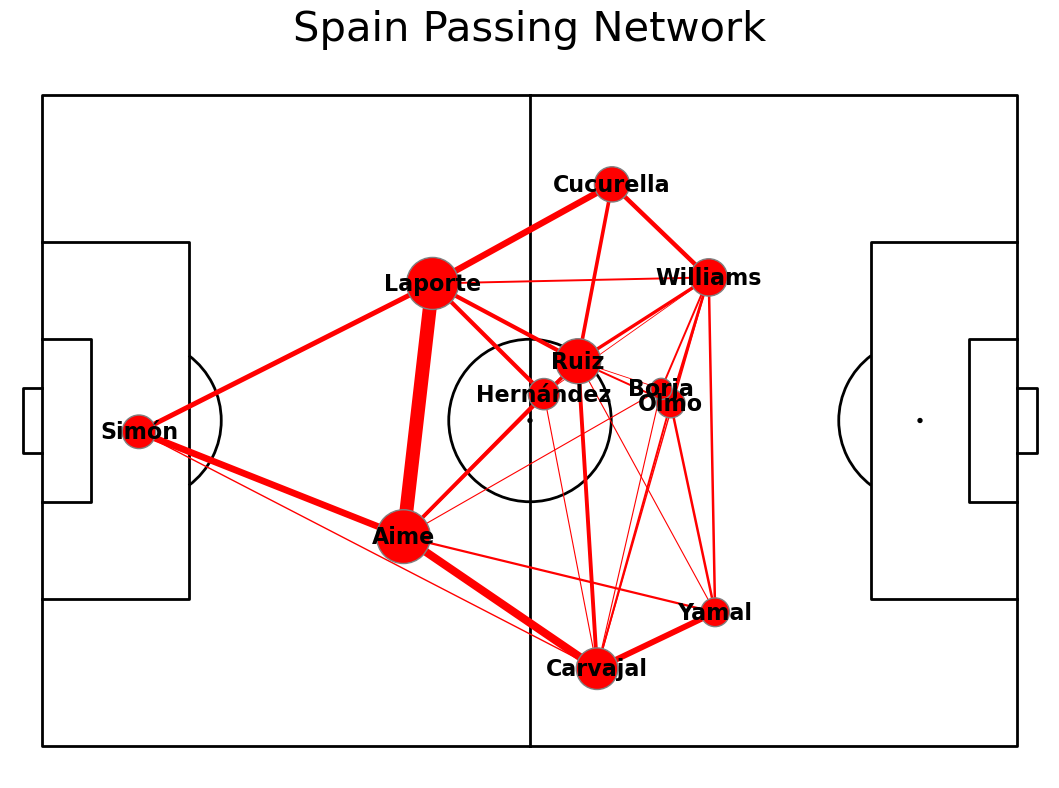

In [105]:
#Plotting 
from mplsoccer import Pitch

# Initialize the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white',line_color='black', goal_type='box')
fig,ax = pitch.draw(figsize=(14,8))

# Scatter the player locations on the pitch
scatter_points = pitch.scatter(scatter.x, scatter.y, s=scatter.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax, zorder=3)

# Annotate player names
for i, row in scatter.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight="bold", size=16, ax=ax, zorder=4)

# Draw the lines (edges) between players
for i, row in lines_df.iterrows():
    player1, player2 = row['pair_key'].split('_')
    
    # Check if both players exist in the scatter DataFrame
    if player1 in scatter.player_name.values and player2 in scatter.player_name.values:
        player1_coords = scatter.loc[scatter['player_name'] == player1, ['x', 'y']].iloc[0]
        player2_coords = scatter.loc[scatter['player_name'] == player2, ['x', 'y']].iloc[0]
        num_passes = row["pass_count"]
        line_width = (num_passes / lines_df['pass_count'].max() * 10)

        pitch.lines(player1_coords['x'], player1_coords['y'],
                    player2_coords['x'], player2_coords['y'], lw=line_width,
                     color='red', alpha=1, ax=ax, zorder=2)
#lw=line_width
# Set the title
fig.suptitle("Spain Passing Network", fontsize=30)
plt.show()
